### Orbit-ml sandbox (Uber)

https://github.com/uber/orbit


Quick Start with Damped-Local-Trend (DLT) Model  
FULL Bayesian Prediction

In [1]:
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data

# log-transformed data
df = load_iclaims()
# train-test split
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:]

train_df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [ ]:
dlt = DLT(
  response_col='claims', date_col='week',
  regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
  seasonality=52,
)
dlt.fit(df=train_df)



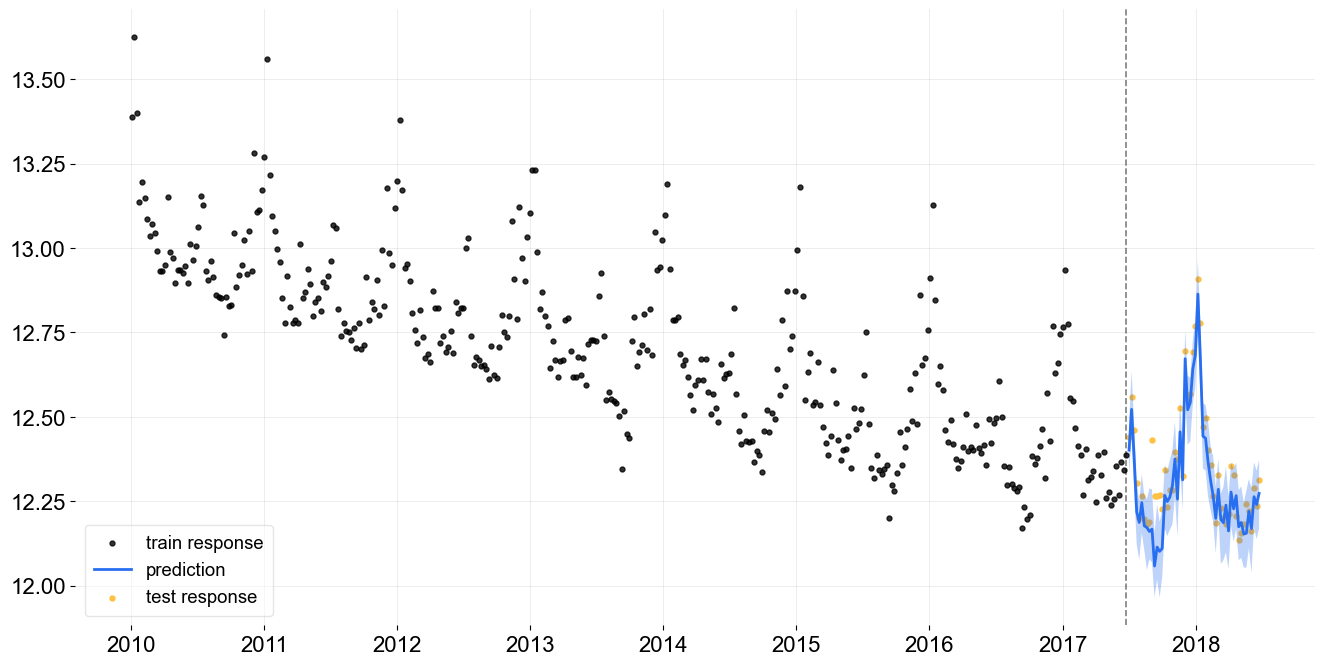

<AxesSubplot:>

In [3]:
# outcomes data frame
predicted_df = dlt.predict(df=test_df)

plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

In [ ]:
#backtesting
